#SALARY PREDICTION:
In a company of USA,they are trying to support the marketing of a new service targeted at potential customers with medium to high salaries.
There is an initial project setup cost of eighteen thousand dollars, a cost of one hundred and twenty five dollars for each offer made and a return of five hundred dollars for each accepted offer
The current marketing strategy, which involves a high degree of investment per offer has achieved a high acceptance rate in the past of seventy five percent by individuals whose salaries exceed fifty thousand US dollars. The goal  is therefore to create a model which can accurately identify individuals whose annual salary exceeds 50,000 US dollars
in future so that they can prepare for project setup cost further

##GOAL:
The goal is to predict the salaries of employees having 50K Dollars

##Dataset:
From UCI Adult dataset: Discribed thorougly in the Document(SALARY PREDICTION.doc) attached along with the Notebook


In [334]:
import pandas as pd
import matplotlib as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [336]:
#Reading Training Dataset
df=pd.read_csv("D:\UIS-LEARN\Spring 2016/Adult/Train.csv")

In [337]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


There are total 32561 records in the Training Dataset

##Exploratory Data Analysis

In [338]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


From the above we can say age,fnlwgt,education-num,capital-gain,capital-loss and hours-per-week are continuous values with age group minimum of 17 to 90 yrs

In [339]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'salary'],
      dtype='object')

######fnlwgt

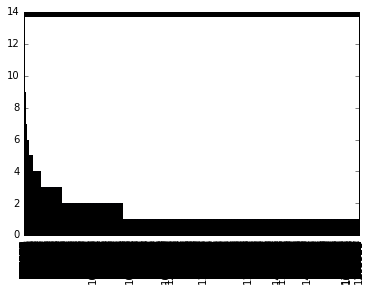

In [276]:

df['fnlwgt'].value_counts().plot(kind='bar')


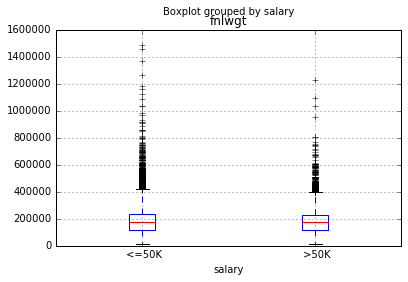

In [47]:
df.boxplot(column='fnlwgt',by='salary') 

In [277]:
df.fnlwgt.value_counts()

164190     13
203488     13
123011     13
113364     12
121124     12
126675     12
148995     12
123983     11
190290     11
126569     11
155659     11
102308     11
120277     11
241998     11
111483     11
120131     11
188246     11
117963     10
174789     10
112497     10
193882     10
125933     10
216129     10
99185      10
125461     10
155489     10
194630     10
125892     10
119793     10
177675     10
           ..
118352      1
239415      1
288341      1
34393       1
110172      1
188982      1
67794       1
343646      1
210527      1
269246      1
349795      1
63079       1
142924      1
1268339     1
542265      1
222789      1
54851       1
312897      1
58447       1
48702       1
378045      1
34361       1
357943      1
65078       1
68318       1
284211      1
312881      1
177711      1
179758      1
229376      1
Name: fnlwgt, dtype: int64

######age

In [278]:
df.age.value_counts()

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, dtype: int64

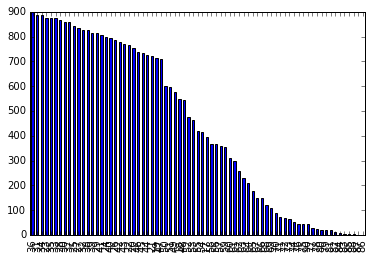

In [72]:
df['age'].value_counts().plot(kind='bar')

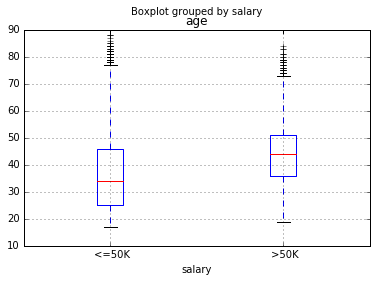

In [46]:
df.boxplot(column='age',by='salary') 

Most of the people with age group 40 plus had salary greater than 50k

######education-num

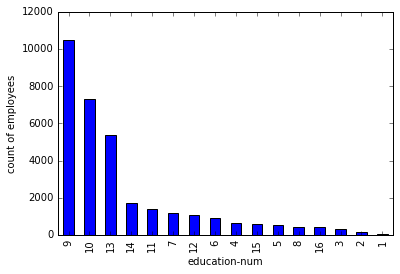

In [18]:
df['education-num'].value_counts().plot(kind='bar')
plt.pyplot.xlabel('education-num')
plt.pyplot.ylabel('count of employees')

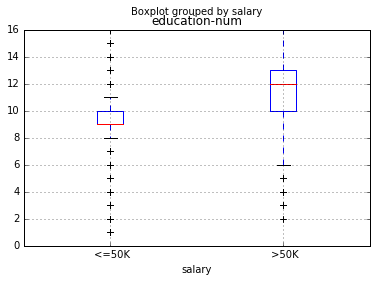

In [344]:
df.boxplot(column='education-num',by='salary') 

######capital-gain

In [14]:
df['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
         ...  
9562         4
1086         4
25124        4
1424         3
2961         3
7896         3
4687         3
2936         3
1173         3
5721         3
2009         3
6360         3
41310        2
6723         2
3456         2
2993         2
401          2
11678        2
2062         2
18481        2
7978         1
1639         1
2538         1
2387         1
5060         1
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, dtype: int64

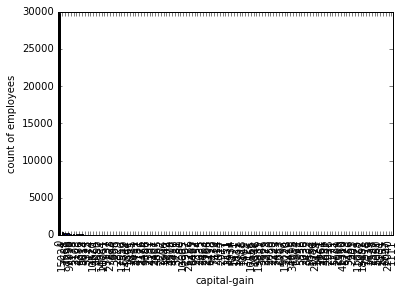

In [16]:
df['capital-gain'].value_counts().plot(kind='bar')
plt.pyplot.xlabel('capital-gain')
plt.pyplot.ylabel('count of employees')


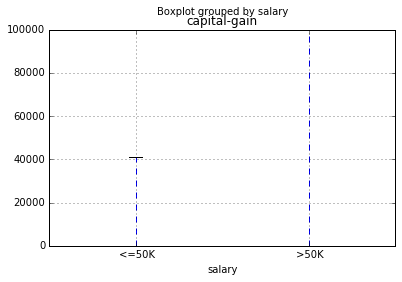

In [49]:
df.boxplot(column='capital-gain',by='salary') 

from above findings most of the values ie 29849 values are zero in feature capital-gain so it may not help us in our findings,but lets check further

######capital-loss

In [17]:
df['capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
1669       24
1741       24
2001       24
1980       23
1719       22
2002       21
2051       21
1408       21
1579       20
2377       20
1721       18
1504       18
1974       18
2339       17
2179       15
1628       15
        ...  
323         3
4356        3
2267        3
3683        2
1755        2
2352        2
1648        2
1138        2
810         2
1735        2
2238        2
2754        2
3004        2
3900        2
974         2
2149        2
1816        2
3770        2
2080        1
2489        1
2282        1
2163        1
155         1
2467        1
1844        1
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital-loss, dtype: int64

from above findings most of the values ie 31042 values are zero in feature capital-loss so it may not help us in our findings,but lets check further

######hours-per-week

In [19]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, dtype: int64

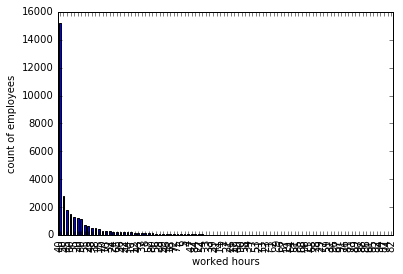

In [20]:
df['hours-per-week'].value_counts().plot(kind='bar')
plt.pyplot.xlabel('worked hours')
plt.pyplot.ylabel('count of employees')

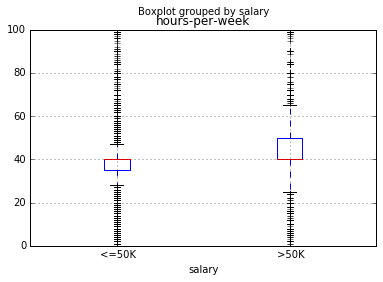

In [21]:
df.boxplot(column='hours-per-week',by='salary') 

Most of the people worked for more than 40hours so it may have significance i our prediction

==>Lets find about the other features present in the dataset

######workclass

In [100]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
missing              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

~This is the categorical variable

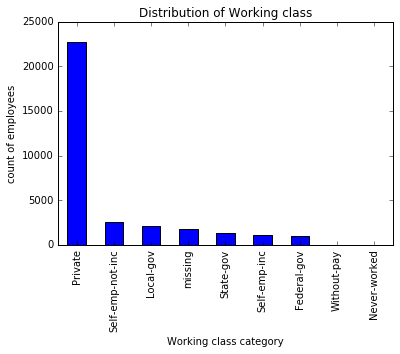

In [101]:
df['workclass'].value_counts().plot(kind='bar',title="Distribution of Working class")
plt.pyplot.xlabel('Working class category')
plt.pyplot.ylabel('count of employees')

Most of the employees are Private employees and also there are very less employees who didnt work
1836 employees are of unknown category

######Education

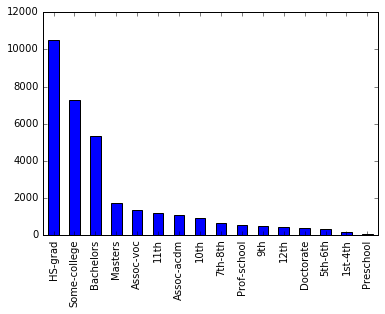

In [364]:
df['education'].value_counts().plot(kind='bar')


In [102]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

~This is a categorical variable

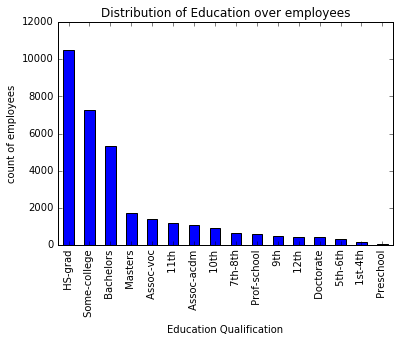

In [23]:
df['education'].value_counts().plot(kind='bar',title="Distribution of Education over employees")
plt.pyplot.xlabel('Education Qualification')
plt.pyplot.ylabel('count of employees')

Most of the employees are HS-grads 

###### marital-status

In [145]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

~Categorical variable 

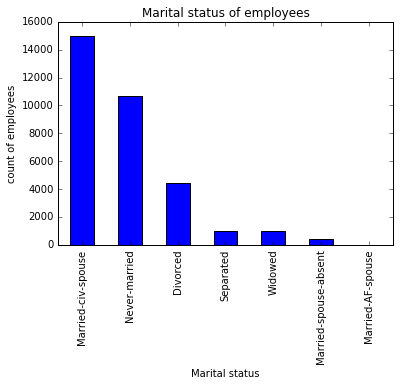

In [146]:
df['marital-status'].value_counts().plot(kind='bar',title="Marital status of employees")
plt.pyplot.xlabel('Marital status')
plt.pyplot.ylabel('count of employees')

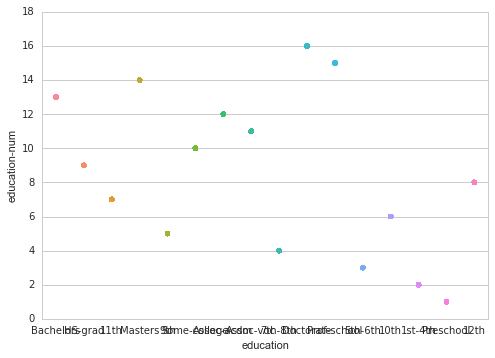

In [340]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="education", y="education-num", data=df);

As the education-num is an index for  education,it is unquie and maynot be ued in used in further predictions

######occupation

In [73]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

~Categorical variable

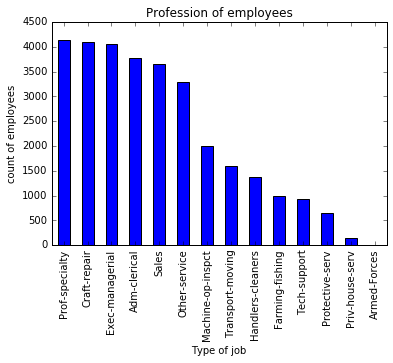

In [74]:
df['occupation'].value_counts().plot(kind='bar',title="Profession of employees")
plt.pyplot.xlabel('Type of job')
plt.pyplot.ylabel('count of employees')

Over 4000 employees are prof-speciality and over 1500 employees profession is not known

######relationship

In [3]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

**We try to minimize the columns of the Relationship below
   Wife/Husband to Married**

In [343]:
ldb_test= df.reset_index()
relationship_test=df['relationship'][0:]

In [344]:
rel_test=relationship_test.str.replace('Husband', 'married')


In [345]:

rel1_test = [ x[:1] for x in rel_test ]

In [346]:

df['relationship'] =rel_test

In [347]:
rel2_test=relationship_test.str.replace('Wife', 'married')

In [348]:
df['relationship'] =rel2_test

In [350]:
#Modified Relationship attribute values
df['relationship'].value_counts()

married           14761
Not-in-family      8305
Own-child          5068
Unmarried          3446
Other-relative      981
Name: relationship, dtype: int64

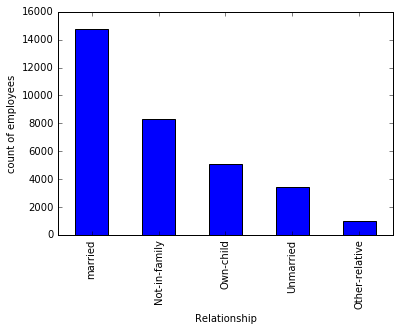

In [332]:
df['relationship'].value_counts().plot(kind='bar',title="")
plt.pyplot.xlabel('Relationship')
plt.pyplot.ylabel('count of employees')

~categorical variable

######sex

In [33]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

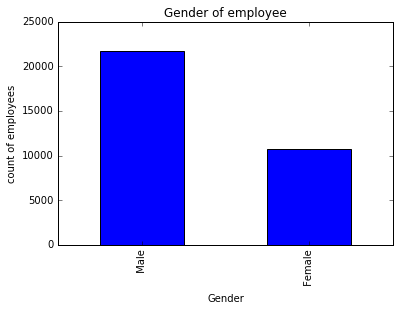

In [34]:
#Over 20000 employees are males and above 10000 are females
df['sex'].value_counts().plot(kind='bar',title="Gender of employee")
plt.pyplot.xlabel('Gender')
plt.pyplot.ylabel('count of employees')

######native-country

In [26]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

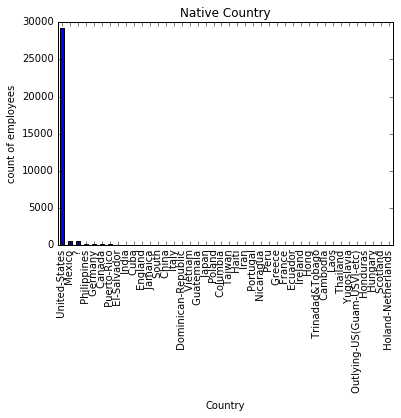

In [27]:
df['native-country'].value_counts().plot(kind='bar',title="Native Country")
plt.pyplot.xlabel('Country')
plt.pyplot.ylabel('count of employees')

Most of the employees belong to America and  I think it maynot help our prediction

######race

In [37]:
df.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

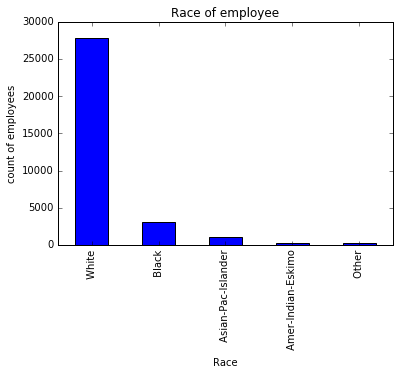

In [38]:
df['race'].value_counts().plot(kind='bar',title="Race of employee")
plt.pyplot.xlabel('Race')
plt.pyplot.ylabel('count of employees')

From the graph we can say most of the employees in the dataset belongs to race 'white',so it may not play significant role in prediction

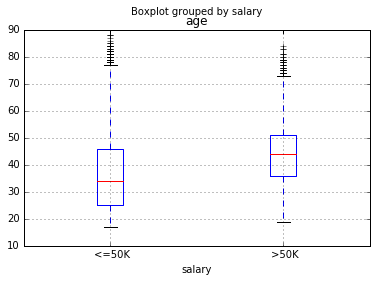

In [39]:
df.boxplot(column='age',by='salary') 

In [351]:
#Pearson correlation between continuous variables
df.corr(method='pearson', min_periods=1)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


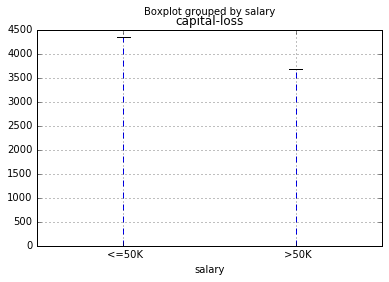

In [50]:
df.boxplot(column='capital-loss',by='salary') 

##Missing Values 

In [352]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'salary'],
      dtype='object')

In [353]:
df[df.age.isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in age column

In [284]:
df[df.workclass.isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
149,43,NaN,174662,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,NaN,252903,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,NaN,38317,1st-4th,2,Divorced,NaN,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,NaN,135105,Bachelors,13,Divorced,NaN,Not-in-family,White,Female,0,0,50,United-States,<=50K


1836 missing values in workclass column

In [285]:
df[df.fnlwgt.isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in fnlwgt column

In [286]:
df[df.education.isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in education column

In [287]:
df[df['education-num'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in education-num column

In [288]:
df[df['marital-status'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in marital status column

In [289]:
df[df['occupation'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
149,43,NaN,174662,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,NaN,252903,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,NaN,38317,1st-4th,2,Divorced,NaN,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,NaN,135105,Bachelors,13,Divorced,NaN,Not-in-family,White,Female,0,0,50,United-States,<=50K


Total 1843 missing values in occupation column

In [290]:
df[df['relationship'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in relationship column

In [291]:
df[df['race'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in race column

In [292]:
df[df['sex'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in sex column

In [293]:
df[df['capital-gain'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in capital-gain column

In [294]:
df[df['capital-loss'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in capital-loss column

In [295]:
df[df['hours-per-week'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in hours-per-week column

In [346]:
df[df['native-country'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [297]:
df[df['salary'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


No missing values in salary column

##Handling Missing Data

we have 1843 values missing in occupation and 1843 values missing in workclass ,we can handle this by either by filling missing value with some value or dropping out missing values,let us fill the missing values with the term 'missing'

In [354]:
df=df.fillna('missing')

##Cleaning up data

Most of the data is clean except 583 values are tagged as '?' in native-country,we can handle this by filling this value with frequently occuring value ie 'United States'

In [224]:
df['native-country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [355]:

native_test=df['native-country'][0:]
nat_test=native_test.str.replace('?', ' United-States')

In [356]:
df['native-country'] =nat_test

In [357]:
df['native-country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000007933FB70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000079D30BE0>]], dtype=object)

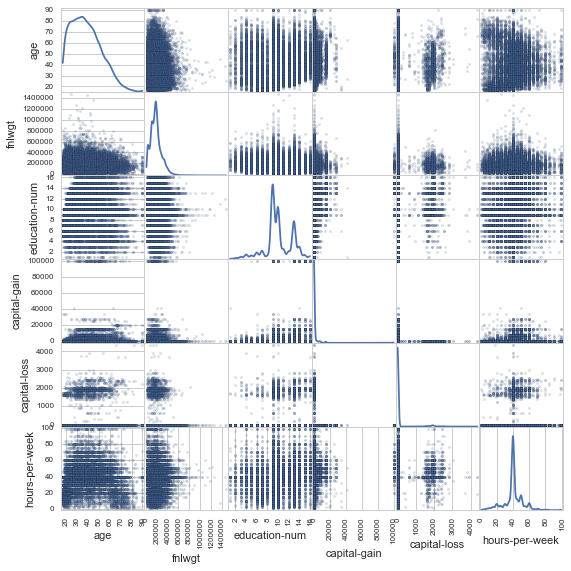

In [358]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(9, 9), diagonal='kde')

##Implementing Model
   Lets us consider Random Forest classifier and check how it works
   

##MODEL 2:

In [359]:

X = pd.DataFrame()
X['age'] = df['age']
X['workclass'] = df['workclass']
X['occupation']=df['occupation']
X['relationship']=df['relationship']
X['capital-gain']=df['capital-gain']
X['capital-loss']=df['capital-loss']
X['hours-per-week'] = df['hours-per-week']
X['education']=df['education']
X['marital-status']=df['marital-status']
X['salary']=df['salary']

In [360]:
X.shape

(32561, 10)

salary
 <=50K    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
 >50K     [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
dtype: object

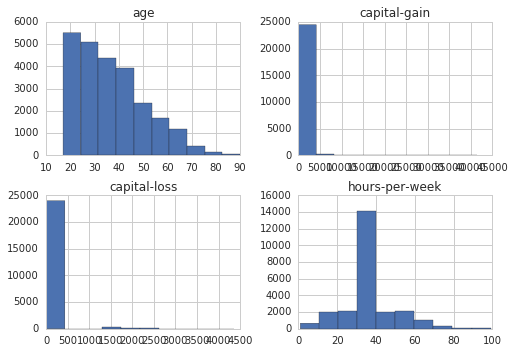

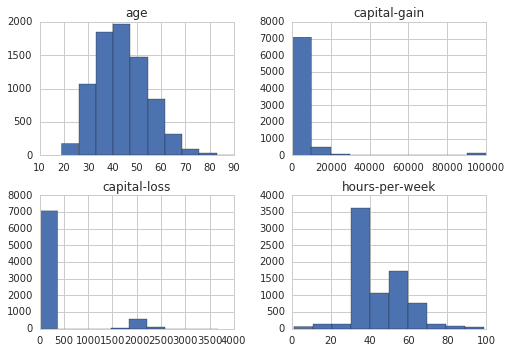

In [361]:
#Hisograms grouby Salary
X.groupby('salary').hist()

In [363]:
X['salary'] = pd.get_dummies(X.salary,prefix='salary')

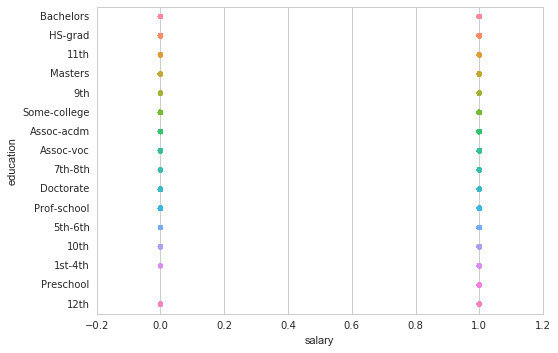

In [364]:
sns.stripplot(x="salary", y="education", data=X);

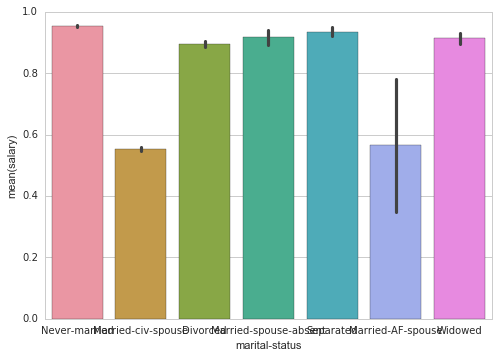

In [50]:
#to check distribution of Marital-status attribute over salary
sns.barplot(x="marital-status", y="salary", data=X);

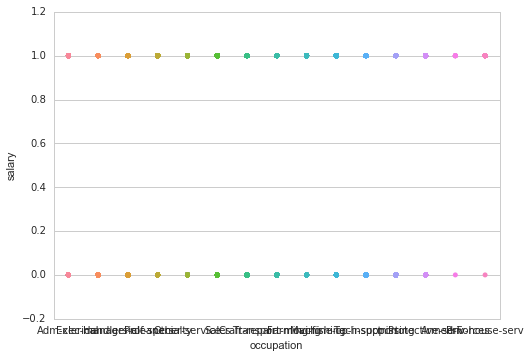

In [32]:
sns.stripplot(x="occupation", y="salary", data=X);

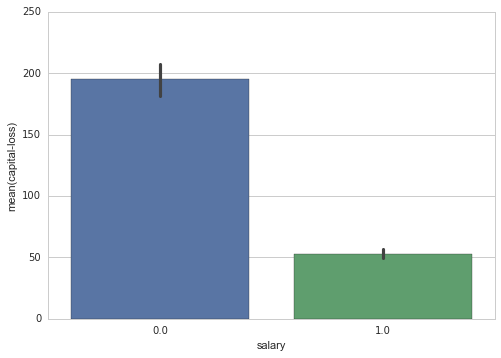

In [36]:
sns.barplot(x="salary", y="capital-loss", data=X);

==>We have predictable variable i.e salary where employees with salary '<50K' are more than employees with salary '>50K',it is shown    using visualization below 

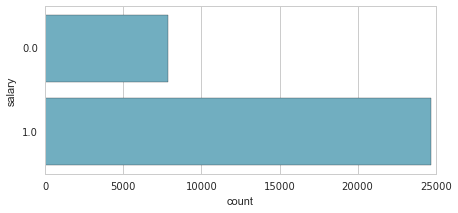

In [41]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="salary", data=X, color="c");

salary is the variable we are going to predict,so going to drop tht feature

In [365]:
y = X['salary']
X = X.drop(['salary'], axis=1)

In [34]:
X.shape

(32561, 9)

In [366]:

def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [367]:
describe_categorical(X)

,workclass,occupation,relationship,education,marital-status
count,32561,32561,32561,32561,32561
unique,9,15,5,16,7
top,Private,Prof-specialty,married,HS-grad,Married-civ-spouse
freq,22696,4140,14761,10501,14976


In [297]:
  
categorical_variables= ['workclass','occupation','education','relationship','marital-status']

In [298]:
#converting categorical variables into continuous by creating dummy variables
for variable in categorical_variables:

    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [299]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

##Best model estimater
* ####Parameters to test are:
    * <b>n_estimators</b>: The number of trees in the forest.
    * <b>max_features</b>: The number of features to consider when looking for the best split.
    * <b>min_samples_leaf</b>: The minimum number of samples in newly created leaves.
    * <b>n_jobs</b>: Determines if multiple processors should be used to train and test the model.

In [300]:

### Grid Search
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
                              

In [301]:
estimator.fit(X, y)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [302]:
rfc_best=estimator.best_estimator_

##LOADING TEST.CSV FILE

In [303]:
#Loading test.csv file
df2=pd.read_csv("D:\UIS-LEARN\Spring 2016/Adult/Test.csv")

In [304]:
X1 = pd.DataFrame()
X1['age'] = df2['age']
X1['workclass'] = df2['workclass']
#X1['fnlwgt']=df2['fnlwgt']
#X1['education-num']=df2['education-num']
X1['occupation']=df2['occupation']
X1['relationship']=df2['relationship']
X1['capital-gain']=df2['capital-gain']
X1['capital-loss']=df2['capital-loss']
X1['hours-per-week'] = df2['hours-per-week']
X1['education']=df2['education']
X1['marital-status']=df2['marital-status']
X1['salary']=df2['salary']

In [306]:
#Minimizing the Relationship attribute values
relationship_test1=X1['relationship'][0:]
rel_test1=relationship_test1.str.replace('Husband', 'married')

In [307]:
X1['relationship'] =rel_test1

In [308]:
rel_test2=relationship_test1.str.replace('Wife', 'married')

In [309]:
X1['relationship'] =rel_test2

In [310]:
X1['salary'] = pd.get_dummies(X1.salary,prefix='salary')

In [311]:
y1 = X1['salary']
X1 = X1.drop(['salary'], axis=1)

In [162]:
X1.head(2)

,age,workclass,occupation,relationship,capital-gain,capital-loss,hours-per-week,education
0,25,Private,Machine-op-inspct,Own-child,0,0,40,11th
1,38,Private,Farming-fishing,married,0,0,50,HS-grad


In [70]:
X1.dtypes

age                int64
workclass         object
occupation        object
relationship      object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
education         object
marital-status    object
dtype: object

In [312]:
def describe_categorical(X1):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X1[X1.columns[X1.dtypes == "object"]].describe().to_html()))


In [313]:
describe_categorical(X1)

,workclass,occupation,relationship,education,marital-status
count,15318,15315,16281,16281,16281
unique,8,14,5,16,7
top,Private,Prof-specialty,married,HS-grad,Married-civ-spouse
freq,11210,2032,7286,5283,7403


In [314]:
categorical_variables = ['occupation','education','workclass','relationship','marital-status']

In [315]:
for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X1[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X1[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X1 = pd.concat([X1, dummies], axis=1)
    X1.drop([variable], axis=1, inplace=True)

In [268]:
X1.shape

(16281, 52)

In [170]:
y1.shape

(16281L,)

In [316]:
y_hat1=model.predict(X1)

In [317]:
y_hat1

array([ 1.,  0.,  1., ...,  0.,  1.,  1.])

In [318]:
y_hat2 =rfc_best.predict(X1)

In [319]:
y_hat2

array([ 1.,  0.,  1., ...,  1.,  1.,  1.])

In [273]:
y_hat1.shape

(16281L,)

##MODEL EVALUATION USING ROCSCORE

In [320]:
accuracy = accuracy_score(y1,y_hat2)
print "Accuracy: ", accuracy

Accuracy:  0.792211780603


In [321]:
roc = roc_auc_score(y1, rfc_best.predict_proba(X1)[:,1])
print "AUC Score: ", roc

AUC Score:  0.779638770593


##Classification report gives Precision and Recall details.
   * Precision is the fraction of correctly identified examples of a class (ratio of true positives to all positives).
   * Recall is the fraction of observations classified in that class that was correctly classified.
   * Where high precision relates to a 'low false positive rate', and high recall relates to a 'low false negative rate'.
   * High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

In [322]:
print classification_report(y1, rfc_best.predict(X1))

             precision    recall  f1-score   support

        0.0       0.60      0.37      0.46      3846
        1.0       0.83      0.92      0.87     12435

avg / total       0.77      0.79      0.77     16281



60% of the records retrieved having salary greater than 50K but 40% chances of retrieved results failed 
37% of the actual records present in the dataset whose salary greater than 50K are retrieved but remaining docs 63% of the actuals results weren't retireved

##ROC CURVE

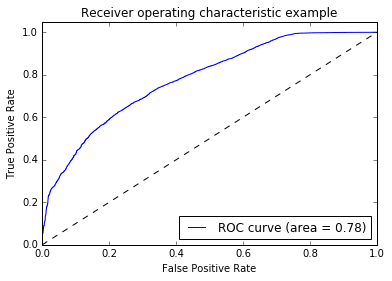

In [323]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y1, rfc_best.predict_proba(X1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##Performance of Model2

In this model2 ,we got
Accuracy:  0.792
ROC: 0.779
Precision/Recall: 0.60/.37
So this is not a pretty good model as the accuracy  score is 0.79

##MODEL 3:

In [479]:
#Eliminating 'Marital-staus','Sex','fnlwgt','native-country'
X_new = pd.DataFrame()
X_new['age'] = df['age']
X_new['workclass'] = df['workclass']
X_new['occupation']=df['occupation']
X_new['relationship']=df['relationship']
X_new['capital-gain']=df['capital-gain']
X_new['capital-loss']=df['capital-loss']
X_new['hours-per-week'] = df['hours-per-week']
X_new['education']=df['education']
X_new['salary']=df['salary']

In [481]:
X_new['relationship'].value_counts()

married           14761
Not-in-family      8305
Own-child          5068
Unmarried          3446
Other-relative      981
Name: relationship, dtype: int64

In [482]:
X_new['salary'] = pd.get_dummies(X_new.salary,prefix='salary')

In [483]:
y_new = X_new['salary']
X_new= X_new.drop(['salary'], axis=1)

In [484]:
X_new.shape

(32561, 8)

In [485]:
def describe_categorical(X_new):
    from IPython.display import display, HTML
    display(HTML(X_new[X_new.columns[X_new.dtypes == "object"]].describe().to_html()))

In [486]:
describe_categorical(X_new)

,workclass,occupation,relationship,education
count,32561,32561,32561,32561
unique,9,15,5,16
top,Private,Prof-specialty,married,HS-grad
freq,22696,4140,14761,10501


In [487]:
categorical_variables1= ['workclass','relationship','occupation','education']

In [488]:
for variable in categorical_variables1:
    # Create array of dummies
    dummies = pd.get_dummies(X_new[variable], prefix=variable)
    # Update X_new to include dummies and drop the main variable
    X_new = pd.concat([X_new, dummies], axis=1)
    X_new.drop([variable], axis=1, inplace=True)

In [490]:
X_new.head(2)

,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,39,2174,0,40,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,50,0,0,13,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [489]:
X_new.shape

(32561, 49)

In [394]:

model.fit(X_new, y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [395]:
estimator.fit(X_new, y_new)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [396]:
rfc_best1=estimator.best_estimator_

In [514]:
df_new=pd.read_csv("D:\UIS-LEARN\Spring 2016/Adult/Test.csv")

In [548]:
#Eliminating 'Marital-staus','Sex','fnlwgt','native-country'
X1_new = pd.DataFrame()
X1_new['age'] = df_new['age']
X1_new['workclass'] = df_new['workclass']
X1_new['occupation']=df_new['occupation']
X1_new['relationship']=df_new['relationship']
X1_new['capital-gain']=df_new['capital-gain']
X1_new['capital-loss']=df_new['capital-loss']
X1_new['hours-per-week'] = df_new['hours-per-week']
X1_new['education']=df_new['education']
X1_new['salary']=df_new['salary']

In [549]:
X1_new.head(2)

,age,workclass,occupation,relationship,capital-gain,capital-loss,hours-per-week,education,salary
0,25,Private,Machine-op-inspct,Own-child,0,0,40,11th,<=50K.
1,38,Private,Farming-fishing,Husband,0,0,50,HS-grad,<=50K.


In [550]:
X1_new['occupation'].value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: occupation, dtype: int64

In [553]:
#Minimizing the Relationship attribute values
relationship_test3=X1_new['relationship'][0:]
rel_test3=relationship_test3.str.replace('Husband', 'married')
X1_new['relationship'] =rel_test3

In [554]:

rel_test4=relationship_test3.str.replace('Wife', 'married')
X1_new['relationship'] =rel_test4

In [555]:
X1_new['relationship'].value_counts()

 married           7286
 Not-in-family     4278
 Own-child         2513
 Unmarried         1679
 Other-relative     525
Name: relationship, dtype: int64

In [556]:
X1_new['salary'] = pd.get_dummies(X1_new.salary,prefix='salary')

In [557]:
y1_new = X1_new['salary']
X1_new= X1_new.drop(['salary'], axis=1)

In [558]:
X1_new.shape

(16281, 8)

In [559]:
def describe_categorical(X1_new):
    from IPython.display import display, HTML
    display(HTML(X1_new[X1_new.columns[X1_new.dtypes == "object"]].describe().to_html()))

In [560]:
describe_categorical(X1_new)

,workclass,occupation,relationship,education
count,15318,15315,16281,16281
unique,8,14,5,16
top,Private,Prof-specialty,married,HS-grad
freq,11210,2032,7286,5283


In [561]:
categorical_variables2= ['workclass','relationship','occupation','education']

In [562]:
for variable in categorical_variables2:
     # Fill missing data with the word "Missing"
    X1_new[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X1_new[variable], prefix=variable)
    # Update X_new to include dummies and drop the main variable
    X1_new = pd.concat([X1_new, dummies], axis=1)
    X1_new.drop([variable], axis=1, inplace=True)

In [563]:
X1_new.head(2)

,age,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,25,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,0,0,50,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [564]:
X1_new.shape

(16281, 49)

In [565]:
y_hatnew =rfc_best1.predict(X1_new)

In [566]:
y_hatnew

array([ 1.,  1.,  0., ...,  0.,  1.,  0.])

In [568]:
accuracy = accuracy_score(y1_new,y_hatnew)
print "Accuracy: ", accuracy

Accuracy:  0.855598550458


In [569]:
roc = roc_auc_score(y1_new, rfc_best1.predict_proba(X1_new)[:,1])
print "AUC Score: ", roc

AUC Score:  0.903144965364


-->Lets do cross validation for the score we got using K_FOLD CROSS VALIDATION

K-fold

In [572]:
from sklearn import cross_validation
scores_new = cross_validation.cross_val_score(rfc_best1, X1_new, y1_new, cv=10)

In [571]:
scores_new

array([ 0.84284837,  0.85082873,  0.85880909,  0.86740331,  0.8514426 ,
        0.84459459,  0.86109404,  0.8494161 ,  0.86846958,  0.85925015])

In [573]:

import math
mean_score = scores_new.mean()
std_dev = scores_new.std()
std_error = scores_new.std() / math.sqrt(scores_new.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.854556 +/-  0.005934
95 percent probability that if this experiment were repeated over and over the average score would be between 0.848622 and 0.860489


#Result
Our single holdout AUC score was 0.85.After K-Fold Cross Validation it is clear that our model was good one as it lies within the range of 0.84 and 0.86.

So, actual AUC of the final model would be between  0.8486 and 0.8604 and Average K-Fold CV score (AUC) is 0.854

In [585]:
print classification_report(y1_new, rfc_best1.predict(X1_new))


             precision    recall  f1-score   support

        0.0       0.73      0.61      0.67      3846
        1.0       0.89      0.93      0.91     12435

avg / total       0.85      0.86      0.85     16281



73% of the records retrieved having salary greater than 50K but 27% chances of retrieved results failed 
61% of the actual records present in the dataset whose salary greater than 50K are retrieved but remaining docs 39% of the actuals results weren't retireved

When Compared to our previous model ,our recall value increased,thereby increasing f1 score

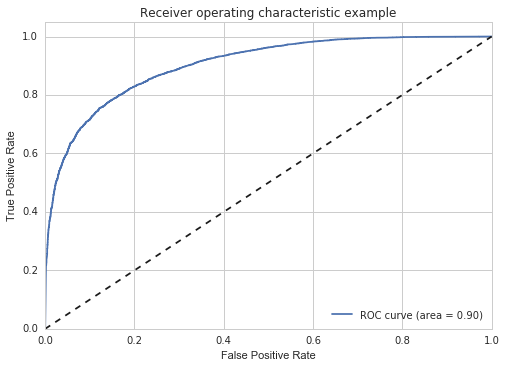

In [574]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y1_new, rfc_best1.predict_proba(X1_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Our ROC Curve is pretty good when compared to previous model as it covers 90% of the area.So our model is performing good

So we have 3846 employees with salary greater than fifty thousand dollars,but currently according to market strategy given 75 percent of people are going to accept the offer 

So according to this,the predicted number of employees who going to accept the offer are:

No of employees whose salary greater than 50k dollars * Percent of people according to market strategy

                                      3846*0.75=2,884

Therfore 2884 employees are going to accept the new offer out of 3846 employees in future

##IMPLEMENTING NAIVE BAYES FOR THE CONSIDERED FEATURES

In [576]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model1 = gnb.fit(X_new, y_new)

In [577]:
model1.predict(X1_new)

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [578]:
from sklearn import cross_validation
scores1 = cross_validation.cross_val_score(model1, X1_new, y1_new, cv=10)

In [579]:
scores1

array([ 0.82627379,  0.8305709 ,  0.84591774,  0.84100675,  0.82259055,
        0.81388206,  0.84265519,  0.82421635,  0.83773817,  0.83097726])

In [581]:

import math
mean_score1 = scores1.mean()
std_dev1 = scores1.std()
std_error1 = scores1.std() / math.sqrt(scores1.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score1 - ci
upper_bound = mean_score1 + ci

print "Score is %f +/-  %f" % (mean_score1, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.831583 +/-  0.005934
95 percent probability that if this experiment were repeated over and over the average score would be between 0.825649 and 0.837516


In [583]:
#Accuracy of the model
roc = roc_auc_score(y1_new, model1.predict_proba(X1_new)[:,1])
print "AUC Score: ", roc

AUC Score:  0.885055915305


In [584]:
#Classification report to validate our performance
print classification_report(y1_new, model1.predict(X1_new))

             precision    recall  f1-score   support

        0.0       0.64      0.65      0.64      3846
        1.0       0.89      0.89      0.89     12435

avg / total       0.83      0.83      0.83     16281



64% of the records retrieved having salary greater than 50K but 36% chances of retrieved results failed 
65% of the actual records present in the dataset whose salary greater than 50K are retrieved but remaining docs 35% of the actuals results weren't retireved
So high recall represents low false negative rate

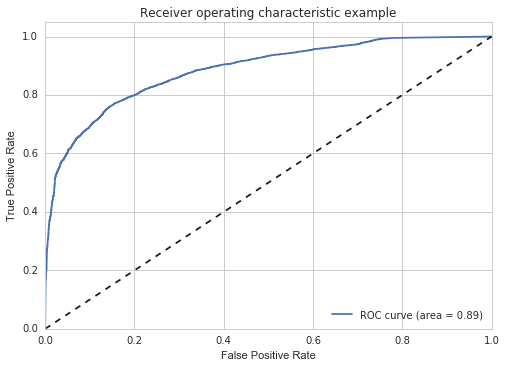

In [586]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y1_new, model1.predict_proba(X1_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##The following grph shows the feature importance

C:\Users\anusha\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


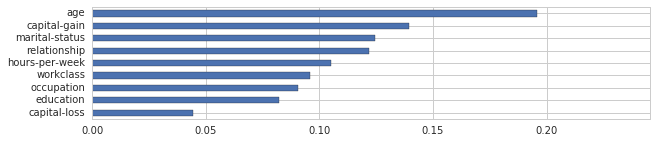

In [587]:
# Complex version that shows the summary view

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = rfc_best.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names,rfc_best.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(rfc_best, X1.columns, summarized_columns=categorical_variables)

**The detailed Documentation is attached along with this two files naled SALARY PREDICTION.doc**